# <center>Box Office Data Analytics</h2>

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## Task 1: Data Loading and Exploration

In [2]:
import pandas as pd
filename = "../input/box-office/box_office.csv"
df = pd.read_csv("../input/box-office/box_office.csv")
df.head(15)

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,...,12,4,2,13,8,4,2,4,4,0
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,...,0,0,1,0,1,1,1,0,0,0
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,10/10/14,...,5,9,1,5,4,3,6,3,1,0
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,3/9/12,...,0,0,1,0,0,1,0,0,0,0
4,5,0,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,2/5/09,...,0,0,1,0,0,1,0,0,0,0
5,6,8000000,NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,8/6/87,...,1,0,4,0,0,1,0,4,0,0
6,7,14000000,http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,/4QjzFuaZmB4btGnLwAgdp23BzIU.jpg,8/30/12,...,4,11,4,12,11,4,9,2,4,0
7,8,0,NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,/83BV8fGy5p9i8RwE9oj76tZ1Ikp.jpg,1/15/04,...,0,0,0,0,0,1,0,0,0,0
8,9,0,NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,/5A8gKzOrF9Z7tSUX6xd5dEx4NXf.jpg,2/16/96,...,0,0,2,0,1,1,1,0,0,0
9,10,6000000,NaN,tt0310281,en,A Mighty Wind,"In ""A Mighty Wind"", director Christopher Guest...",4.672036,/xwD4EsPOGLuKP50Q1gwqAsyhAFB.jpg,4/16/03,...,3,0,2,1,1,1,1,0,0,0


In [3]:
df.shape
print('the numberof films are',df.shape[0])

the numberof films are 3000


In [4]:
df.describe(include = 'all')

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors
count,3000.000000,3.000000e+03,946,3000,3000,3000,2992,3000.000000,2999,3000,...,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
unique,NaN,NaN,941,3000,36,2975,2992,NaN,2999,2398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,http://www.transformersmovie.com/,tt2637294,en,Joshua,"When Lou, who has become the ""father of the In...",NaN,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,9/10/10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4,1,2575,2,1,NaN,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1500.500000,2.253133e+07,NaN,NaN,NaN,NaN,NaN,8.463274,NaN,NaN,...,2.689667,2.438333,2.189000,2.05200,1.808000,1.651333,1.502667,1.197000,0.434333,0.001333
std,866.169729,3.702609e+07,NaN,NaN,NaN,NaN,NaN,12.104000,NaN,NaN,...,4.038993,6.129115,1.597956,3.51142,2.560597,1.353653,1.726940,3.733475,1.235393,0.044709
min,1.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000001,NaN,NaN,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,750.750000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,4.018053,NaN,NaN,...,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1500.500000,8.000000e+06,NaN,NaN,NaN,NaN,NaN,7.374861,NaN,NaN,...,1.000000,0.000000,2.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2250.250000,2.900000e+07,NaN,NaN,NaN,NaN,NaN,10.890983,NaN,NaN,...,3.000000,2.000000,3.000000,2.00000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000


In [5]:
df.isnull().sum()

id                               0
budget                           0
homepage                      2054
imdb_id                          0
original_language                0
                              ... 
departments_Directing            0
departments_Editing              0
departments_Visual Effects       0
departments_Lighting             0
departments_Actors               0
Length: 203, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 203 entries, id to departments_Actors
dtypes: float64(2), int64(188), object(13)
memory usage: 4.6+ MB


In [7]:
df.columns

Index(['id', 'budget', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date',
       ...
       'departments_Art', 'departments_Crew', 'departments_Writing',
       'departments_Costume & Make-Up', 'departments_Camera',
       'departments_Directing', 'departments_Editing',
       'departments_Visual Effects', 'departments_Lighting',
       'departments_Actors'],
      dtype='object', length=203)

<AxesSubplot:>

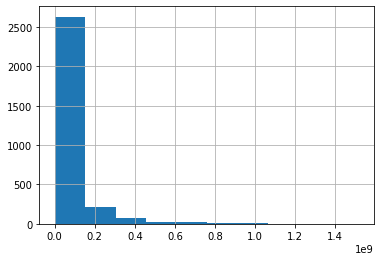

In [8]:
df.revenue.hist()

In [9]:
df[df['revenue'] == df['revenue'].max()]

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors
1126,1127,220000000,http://marvel.com/avengers_movie/,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,89.887648,/cezWGskPY5x7GaglTTRN4Fugfb8.jpg,4/25/12,...,24,23,6,18,8,2,4,29,6,0


In [10]:
df[['id','title','budget','revenue']].sort_values(['revenue'], ascending=False).head(10).style.background_gradient(subset='revenue', cmap='BuGn')

,id,title,budget,revenue
1126,1127,The Avengers,220000000,1519557910
1761,1762,Furious 7,190000000,1506249360
2770,2771,Avengers: Age of Ultron,280000000,1405403694
684,685,Beauty and the Beast,160000000,1262886337
2322,2323,Transformers: Dark of the Moon,195000000,1123746996
906,907,The Dark Knight Rises,250000000,1084939099
2135,2136,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802
2562,2563,Finding Dory,200000000,1028570889
881,882,Alice in Wonderland,200000000,1025491110
734,735,Zootopia,150000000,1023784195


In [11]:
df[df['budget'] == df['budget'].max()]

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors
2135,2136,380000000,http://disney.go.com/pirates/index-on-stranger...,tt1298650,en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,27.88772,/wNUDAq5OUMOtxMlz64YaCp7gZma.jpg,5/14/11,...,3,1,2,2,2,2,4,1,0,0


In [12]:
df[['id','title','budget', 'revenue']].sort_values(['budget'], ascending=False).head(10).style.background_gradient(subset=['budget', 'revenue'], cmap='PuBu')

,id,title,budget,revenue
2135,2136,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802
2209,2210,Pirates of the Caribbean: At World's End,300000000,961000000
2770,2771,Avengers: Age of Ultron,280000000,1405403694
1425,1426,Superman Returns,270000000,391081192
1270,1271,John Carter,260000000,284139100
1630,1631,Transformers: The Last Knight,260000000,604942143
2532,2533,The Hobbit: An Unexpected Journey,250000000,1021103568
961,962,Harry Potter and the Half-Blood Prince,250000000,933959197
906,907,The Dark Knight Rises,250000000,1084939099
666,667,The Hobbit: The Desolation of Smaug,250000000,958400000


In [13]:
df.drop(['imdb_id'], axis=1, inplace=True)

## Task 2: Visualizing the Target Distribution

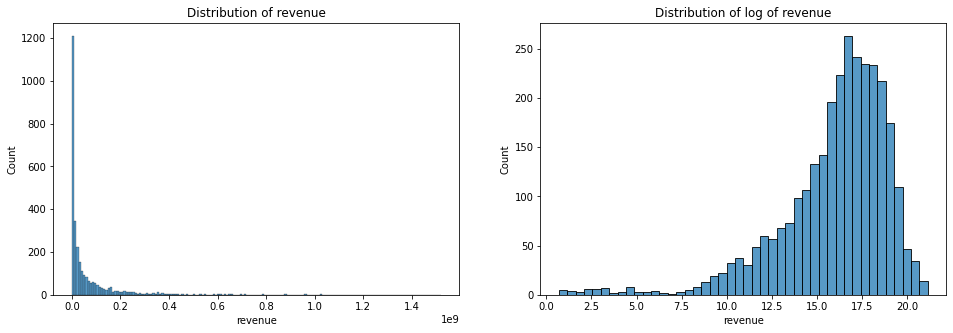

In [14]:
fig, ax = plt.subplots(figsize = (16, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['revenue'], kde=False);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['revenue']), kde=False);
plt.title('Distribution of log of revenue');

In [15]:
df['log_revenue'] = np.log1p(df['revenue'])


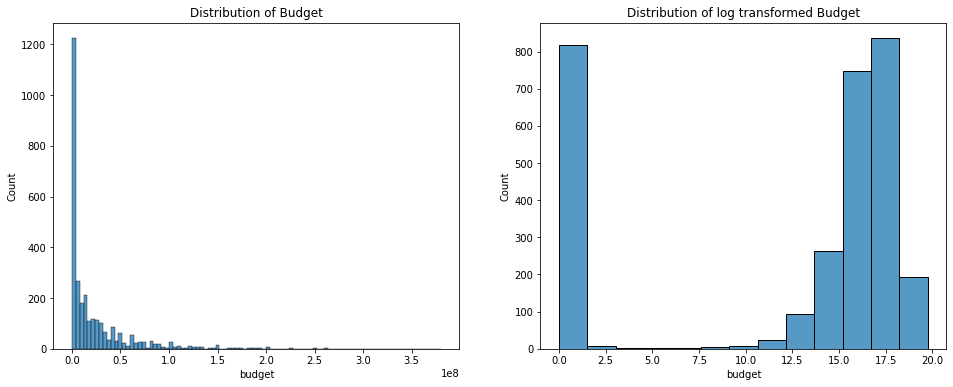

In [16]:
fig, ax = plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
sns.histplot(df['budget'], kde= False);
plt.title('Distribution of Budget');
plt.subplot(1,2,2)
sns.histplot(np.log1p(df['budget']), kde= False);
plt.title('Distribution of log transformed Budget');

In [17]:
df['log_budget'] = np.log1p(df['budget'])

## Task 3: Relationship between Film Revenue and Budget

In [18]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


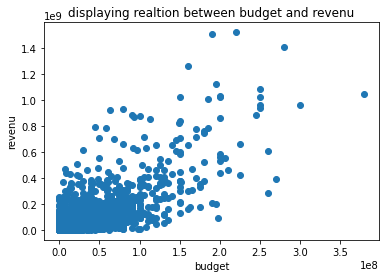

In [19]:
plt.title('displaying realtion between budget and revenu')
plt.xlabel( 'budget')
plt.ylabel('revenu')
plt.scatter(x=df['budget'], y=df['revenue'])

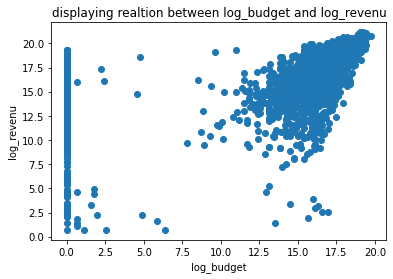

In [20]:
plt.title('displaying realtion between log_budget and log_revenu')
plt.xlabel( 'log_budget')
plt.ylabel('log_revenu')
plt.scatter(x=df['log_budget'], y=df['log_revenue'])

## Task 4: Distribution of Languages in Film

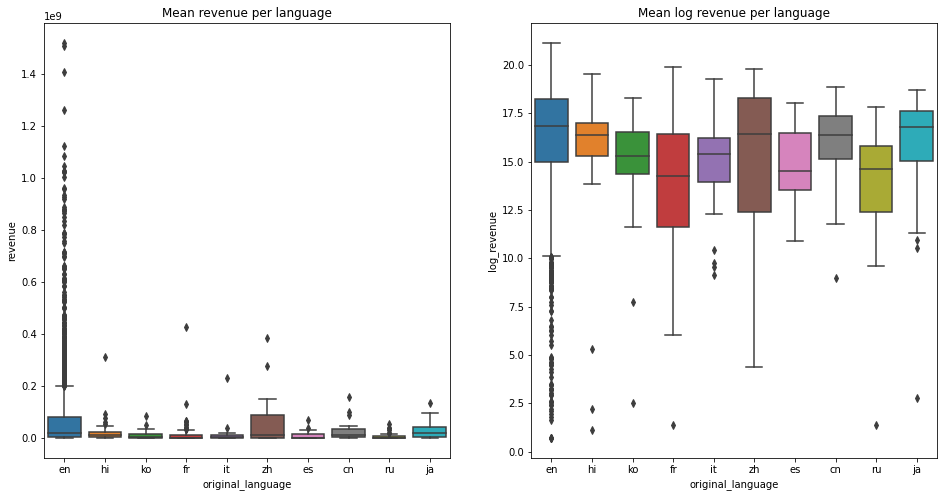

In [21]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='original_language', y='revenue', data=df.loc[df['original_language'].isin(df['original_language'].value_counts().head(10).index)]);
plt.title('Mean revenue per language');
plt.subplot(1, 2, 2)
sns.boxplot(x='original_language', y='log_revenue', data=df.loc[df['original_language'].isin(df['original_language'].value_counts().head(10).index)]);
plt.title('Mean log revenue per language');

In [22]:
for i,e in enumerate(df['original_language'][:5]):
    print(i,e)

0 en
1 en
2 en
3 hi
4 ko


In [23]:
for i in df['original_language']:
    if(i=='en'):
        df['Has_En']=1
    else:
        df['Has_En']=0
df.head()

,id,budget,homepage,original_language,original_title,overview,popularity,poster_path,release_date,runtime,...,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_revenue,log_budget,Has_En
0,1,14000000,NaN,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,93.0,...,13,8,4,2,4,4,0,16.326300,16.454568,1
1,2,40000000,NaN,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,113.0,...,0,1,1,1,0,0,0,18.370959,17.504390,1
2,3,3300000,http://sonyclassics.com/whiplash/,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,10/10/14,105.0,...,5,4,3,6,3,1,0,16.387512,15.009433,1
3,4,1200000,http://kahaanithefilm.com/,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,3/9/12,122.0,...,0,0,1,0,0,0,0,16.588099,13.997833,1
4,5,0,NaN,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,2/5/09,118.0,...,0,0,1,0,0,0,0,15.182615,0.000000,1


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='original_language', ylabel='count'>

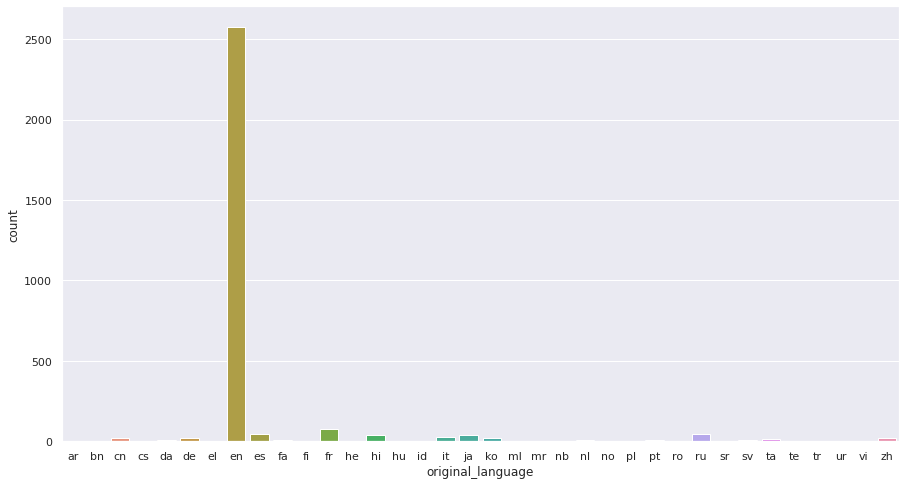

In [24]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(df['original_language'].sort_values())

Text(0, 0.5, 'Number of Movies')

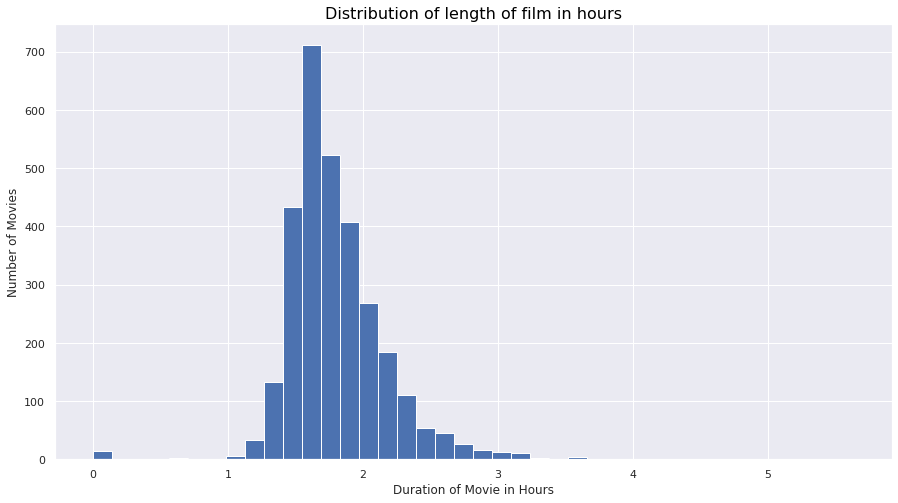

In [25]:
plt.hist(df['runtime'].fillna(0) / 60, bins=40);
plt.title('Distribution of length of film in hours', fontsize=16, color='black');
plt.xlabel('Duration of Movie in Hours')
plt.ylabel('Number of Movies')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


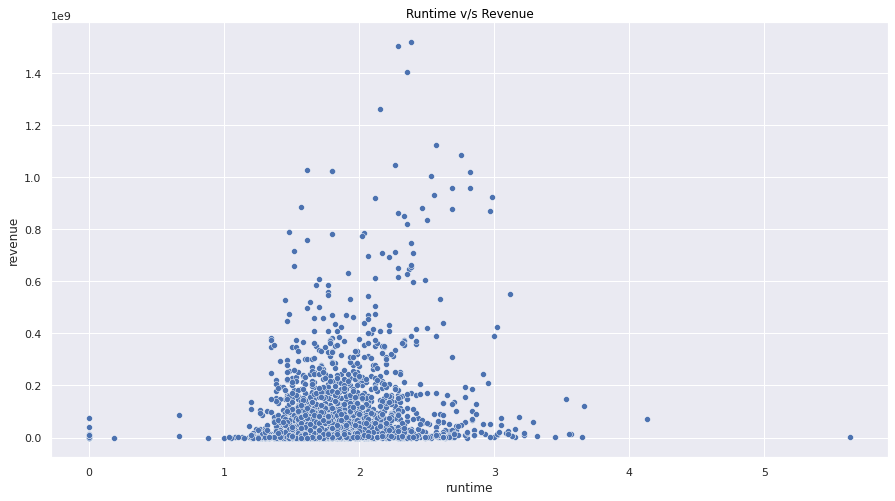

In [26]:
sns.scatterplot(df['runtime'].fillna(0) /60, df['revenue'])
plt.title('Runtime v/s Revenue',color='black');

In [27]:
df['popularity'].isnull().sum()

0

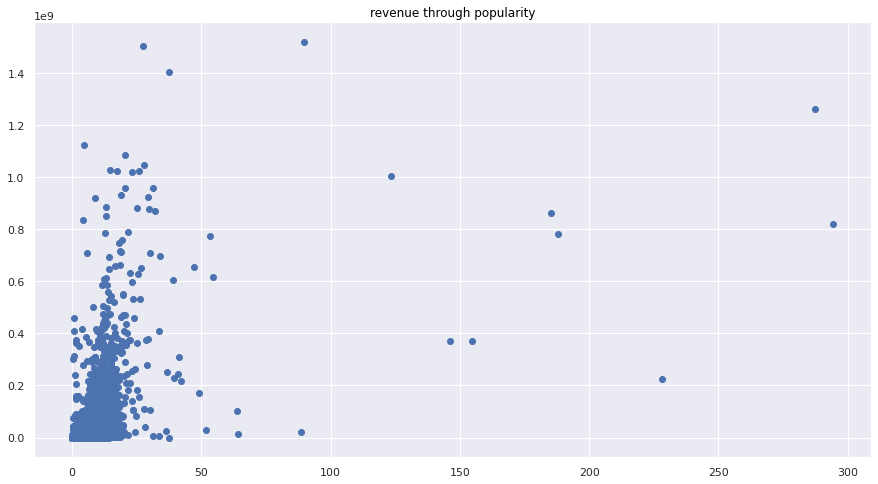

In [28]:
sns.set(rc = {'figure.figsize':(15,8)})
plt.scatter('popularity','revenue',data=df)
plt.title('revenue through popularity',color='black');
plt.show()

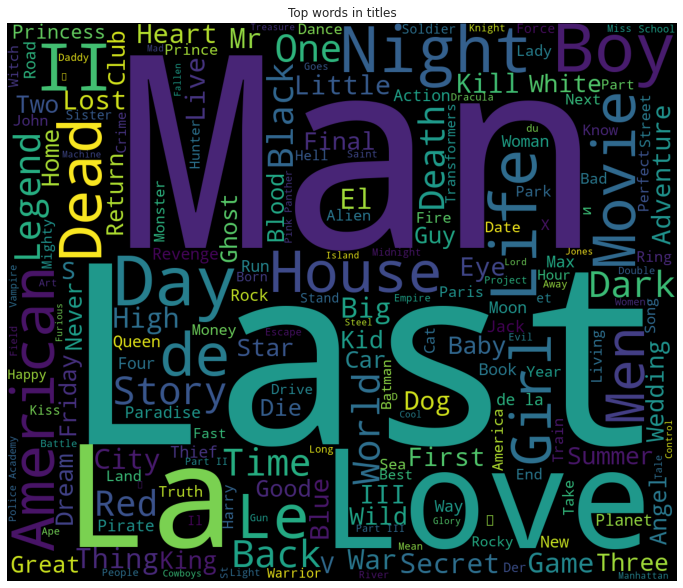

In [29]:
plt.figure(figsize = (12, 12))
text = ' '.join(df['original_title'].values)
wordcloud = WordCloud(max_font_size=None,
                      background_color='black',
                      width=1200,
                      height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in titles')
plt.axis("off")
plt.show()

In [30]:
df.drop(['poster_path'], axis=1, inplace=True)

In [31]:
df[['all_genres']]

,all_genres
0,Comedy
1,Comedy Drama Family Romance
2,Drama
3,Drama Thriller
4,Action Thriller
...,...
2995,Comedy Romance
2996,Drama Music
2997,Action Crime Mystery Thriller
2998,Comedy Romance


In [32]:
pd.get_dummies(df[['all_genres']])

,all_genres_Action,all_genres_Action Adventure,all_genres_Action Adventure Animation,all_genres_Action Adventure Animation Comedy Drama Family,all_genres_Action Adventure Animation Comedy Family Fantasy,all_genres_Action Adventure Animation Comedy Family Fantasy Science Fiction,all_genres_Action Adventure Animation Comedy Music,all_genres_Action Adventure Animation Family,all_genres_Action Adventure Animation Family Fantasy,all_genres_Action Adventure Animation Family Science Fiction,...,all_genres_Romance Thriller,all_genres_Romance Western,all_genres_Science Fiction,all_genres_Science Fiction Thriller,all_genres_Thriller,all_genres_Thriller War,all_genres_Thriller Western,all_genres_War,all_genres_War Western,all_genres_Western
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
